<a href="https://colab.research.google.com/github/Hanishkaa01/DEEP-LEARNING-TECHNIQUES-LAB-EXP/blob/main/exp14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Checking GPU availability...
✅ GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

🔹 Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
✔ Dataset loaded successfully!

🔹 Preprocessing images...
✔ Preprocessing done!

🔹 Loading Pre-trained VGG16 (feature extractor)...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
✔ Base model loaded and frozen!

🔹 Extracting deep features from images...
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 189ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step
✔ Features extracted!
Feature shape: (5000, 7, 7, 512)

🔹 Building classifier on top of extracted features...

🔹 Training classifier...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2383 - loss: 2.1613 - val_accuracy: 0.5150 - val_loss: 1.5599
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4471 - loss: 1.5875 - val_accuracy: 0.5440 - val_loss: 1.3898
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5238 - loss: 1.3993 - val_accuracy: 0.6010 - val_loss: 1.2754
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5606 - loss: 1.2921 - val_accuracy: 0.6060 - val_loss: 1.2035
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6146 - loss: 1.1756 - val_accuracy: 0.6060 - val_loss: 1.1902
✔ Training complete!


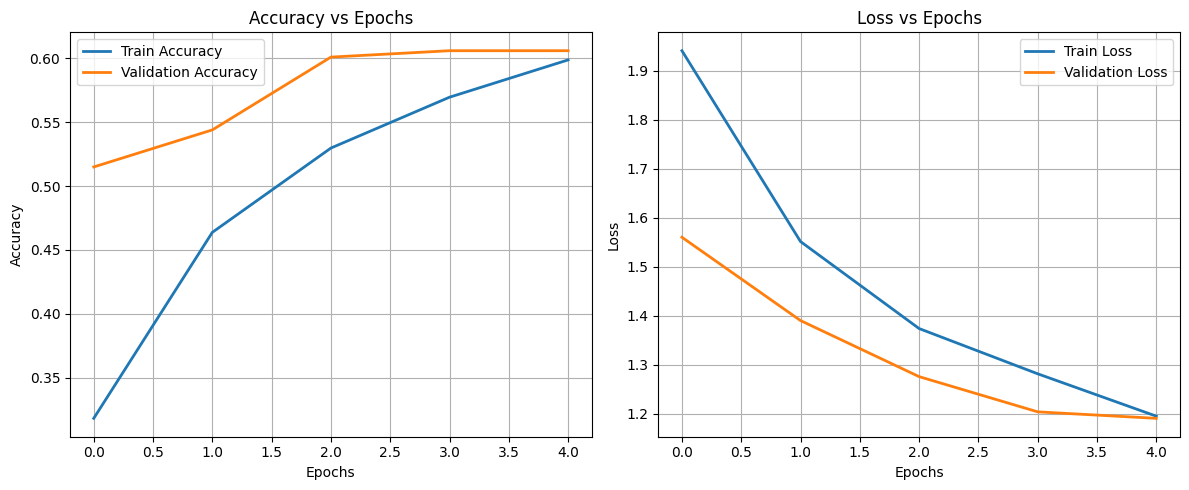


🔹 Evaluating classifier performance...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

📊 Classification Report:

              precision    recall  f1-score   support

    airplane       0.56      0.65      0.60       103
  automobile       0.84      0.66      0.74        89
        bird       0.50      0.52      0.51       100
         cat       0.51      0.25      0.34       103
        deer       0.44      0.63      0.52        90
         dog       0.37      0.67      0.48        86
        frog       0.77      0.61      0.68       112
       horse       0.82      0.62      0.70       102
        ship       0.78      0.65      0.71       106
       truck       0.74      0.80      0.77       109

    accuracy                           0.61      1000
   macro avg       0.63      0.61      0.61      1000
weighted avg       0.64      0.61      0.61      1000


📈 Confusion Matrix:

[[67  1  7  2  8  4  1  1  7  5]
 [ 3 59  3  2  4  3  0  0  4 11]
 [ 9  2 52  1 12 19  3  1  0  1]
 [ 5  2 15 26 

In [ ]:
# ==========================================
# Feature Extraction using Pre-trained CNN (VGG16)
# ==========================================

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import time

# ------------------------------------------------------------
# 1. GPU Check
# ------------------------------------------------------------
print("🔹 Checking GPU availability...")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ GPU Available:", gpus)
else:
    print("❌ No GPU detected — running on CPU")

start_time = time.time()

# ------------------------------------------------------------
# 2. Load CIFAR-10 dataset (sample dataset)
# ------------------------------------------------------------
print("\n🔹 Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("✔ Dataset loaded successfully!")

# Use smaller subset for faster demo
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:1000], y_test[:1000]

# ------------------------------------------------------------
# 3. Preprocess data (resize and normalize)
# ------------------------------------------------------------
print("\n🔹 Preprocessing images...")
x_train = tf.image.resize(x_train, (224, 224)) / 255.0
x_test = tf.image.resize(x_test, (224, 224)) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print("✔ Preprocessing done!")

# ------------------------------------------------------------
# 4. Load Pre-trained CNN (VGG16) without top layer
# ------------------------------------------------------------
print("\n🔹 Loading Pre-trained VGG16 (feature extractor)...")
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

print("✔ Base model loaded and frozen!")

# ------------------------------------------------------------
# 5. Extract Features
# ------------------------------------------------------------
print("\n🔹 Extracting deep features from images...")
train_features = base_model.predict(x_train, batch_size=32, verbose=1)
test_features = base_model.predict(x_test, batch_size=32, verbose=1)

print("✔ Features extracted!")
print("Feature shape:", train_features.shape)

# Flatten feature maps for classifier
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# ------------------------------------------------------------
# 6. Define a Simple Classifier on Top
# ------------------------------------------------------------
print("\n🔹 Building classifier on top of extracted features...")
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(train_features.shape[1],)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

classifier.compile(optimizer=Adam(learning_rate=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# ------------------------------------------------------------
# 7. Train Classifier
# ------------------------------------------------------------
print("\n🔹 Training classifier...")
history = classifier.fit(
    train_features, y_train,
    validation_data=(test_features, y_test),
    epochs=5,
    batch_size=32,
    verbose=1
)
print("✔ Training complete!")

# ------------------------------------------------------------
# 8. Plot Accuracy vs Epochs and Loss vs Epochs
# ------------------------------------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 9. Evaluate Model
# ------------------------------------------------------------
print("\n🔹 Evaluating classifier performance...")
y_pred = classifier.predict(test_features)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=[
    'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'
]))

print("\n📈 Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred_classes))

print("\n✅ Total Execution Time: {:.2f} seconds".format(time.time() - start_time))
